# Projeto 1 - Acertar o tipo de flor da espécie Iris

<img src="http://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" width="700" height="100"/>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from plotnine import *

In [5]:
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df["species"].drop_duplicates()

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object

# Ver se tem valores fora do padrão
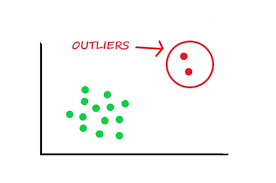

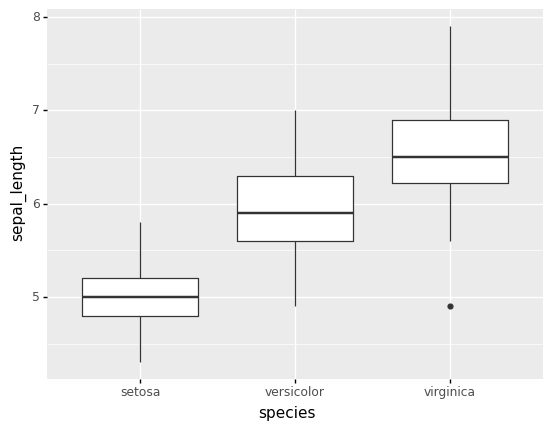

<ggplot: (340932560)>

In [12]:
(
    ggplot(df)
    + geom_boxplot(aes(x='species', y='sepal_length'))
)

# Separar em Treino e Teste

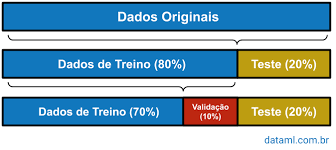

In [133]:
train , test = train_test_split(df,test_size=0.2,random_state=0)

In [134]:
train = train.query("species == 'versicolor' | species == 'virginica'")
test = test.query("species == 'versicolor' | species == 'virginica'")

In [135]:
train['species'] = np.where(train['species'] == "versicolor", 0,1)
test['species'] = np.where(test['species'] == "versicolor", 0,1)

# Retirar colunas que não usaremos no modelo

<img src="https://cdn2.iconfinder.com/data/icons/flat-pro-word-processing-set-5/32/table-column-delete-512.png" width="200" height="100"/>

# Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://miro.medium.com/max/2134/1*C5XM-0LZSMBd1EEiYZbYxA.png" width="350" height="100"/>

# Valor Vazio

<img src="https://www.logianalytics.com/wp-content/uploads/2019/06/Missing-values-2.png" width="250" height="100"/>

In [136]:
pd.isna(df).sum().to_frame('Valor Vazio')

,Valor Vazio
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# Categóricas em numéricas

<img src="https://miro.medium.com/max/1879/1*O_pTwOZZLYZabRjw3Ga21A.png" width="600" height="100"/>

# Separar a variável target das features (tanto do treino como do teste)
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [137]:
train_x = train.drop('species',axis=1)
train_y = train['species']

In [138]:
test_x = test.drop('species',axis=1)
test_y = test['species']

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://i.ibb.co/N3pbLFp/LR-LDA-DT-KNN-SVM-RF.png" width="200" height="80"/>

In [139]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier(min_samples_leaf=10).fit(train_x, train_y)
KNN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC(probability=True).fit(train_x,train_y) 
RF = RandomForestClassifier().fit(train_x,train_y)

In [128]:
train['probabilidade LR'] = LR.predict_proba(train_x)[:,1]
train['probabilidade DT'] = DT.predict_proba(train_x)[:,1]
train['probabilidade SVM'] = SVM.predict_proba(train_x)[:,1]
train['cutoff / threshold'] = 0.5
train['predito LR'] = LR.predict(train_x)
train['predito DT'] = DT.predict(train_x)
train['predito SVM'] = SVM.predict(train_x)
train

,sepal_length,sepal_width,petal_length,petal_width,species,probabilidade LR,probabilidade DT,probabilidade SVM,cutoff / threshold,predito LR,predito DT,predito SVM
137,6.4,3.1,5.5,1.8,1,0.871331,0.900000,0.950895,0.5,1,1,1
84,5.4,3.0,4.5,1.5,0,0.240067,0.307692,0.121871,0.5,0,0,0
127,6.1,3.0,4.9,1.8,1,0.599575,0.900000,0.623151,0.5,1,1,1
132,6.4,2.8,5.6,2.2,1,0.958341,1.000000,0.991922,0.5,1,1,1
59,5.2,2.7,3.9,1.4,0,0.056760,0.000000,0.015801,0.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
70,5.9,3.2,4.8,1.8,0,0.524043,0.900000,0.485214,0.5,1,1,1
87,6.3,2.3,4.4,1.3,0,0.149001,0.000000,0.057237,0.5,0,0,0
103,6.3,2.9,5.6,1.8,1,0.907355,0.900000,0.972294,0.5,1,1,1
67,5.8,2.7,4.1,1.0,0,0.038012,0.000000,0.006471,0.5,0,0,0


In [129]:
print("Acurácia treino LR:", LR.score(train_x, train_y), "\n")
print("Acurácia treino LDA:", LDA.score(train_x, train_y), "\n")
print("Acurácia treino DT:", DT.score(train_x, train_y), "\n")
print("Acurácia treino KNN:", KNN.score(train_x, train_y), "\n")
print("Acurácia treino SVM:", SVM.score(train_x, train_y), "\n")
print("Acurácia treino RF:", SVM.score(train_x, train_y), "\n")

Acurácia treino LR: 0.9506172839506173 

Acurácia treino LDA: 0.9629629629629629 

Acurácia treino DT: 0.9382716049382716 

Acurácia treino KNN: 0.9259259259259259 

Acurácia treino SVM: 0.9382716049382716 

Acurácia treino RF: 0.9382716049382716 



# Testar agora pro teste. Ver se houve overfitting

In [26]:
print("Acurácia teste LR:", LR.score(test_x, test_y), "\n")
print("Acurácia teste LDA:", LDA.score(test_x, test_y), "\n")
print("Acurácia teste DT:", DT.score(test_x, test_y), "\n")
print("Acurácia teste KNN:", KNN.score(test_x, test_y), "\n")
print("Acurácia teste SVM:", SVM.score(test_x, test_y), "\n")
print("Acurácia teste RF:", SVM.score(test_x, test_y), "\n")

Acurácia teste LR: 1.0 

Acurácia teste LDA: 1.0 

Acurácia teste DT: 1.0 

Acurácia teste KNN: 0.9473684210526315 

Acurácia teste SVM: 1.0 

Acurácia teste RF: 1.0 



## Matriz de confusão + Métricas
<img src="https://www.researchgate.net/profile/Rune-Jacobsen/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png" width="350" height="80"/>

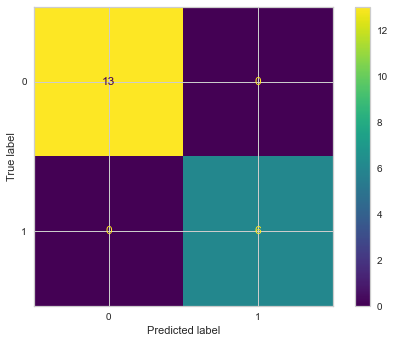

In [149]:
plot_confusion_matrix(LR, test_x, test_y)
plt.show()

## Curva ROC
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/250px-Roc-draft-xkcd-style.svg.png" width="350" height="80"/>

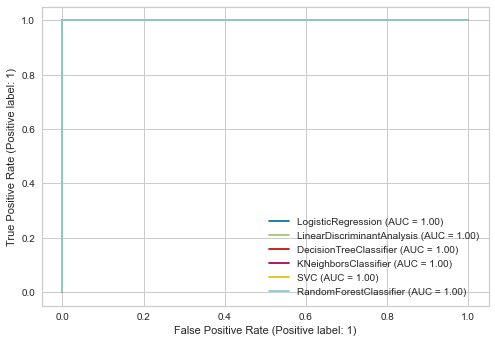

In [152]:
plot_roc_curve(LR, test_x, test_y, ax=plt.gca())
plot_roc_curve(LDA, test_x, test_y, ax=plt.gca())
plot_roc_curve(DT, test_x, test_y, ax=plt.gca())
plot_roc_curve(KNN, test_x, test_y, ax=plt.gca())
plot_roc_curve(SVM, test_x, test_y, ax=plt.gca())
plot_roc_curve(RF, test_x, test_y, ax=plt.gca())

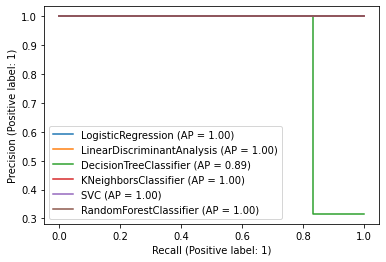

In [142]:
plot_precision_recall_curve(LR, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(LDA, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(DT, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(KNN, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(SVM, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(RF, test_x, test_y, ax=plt.gca())